In [2]:
import numpy as np
import matplotlib.pyplot as plt
from kawin.KWNEuler import PrecipitateModel
import scienceplots

with open('NiCrAl_TCresults.csv', 'r') as file:
    lines = file.readlines()
    tn, n, tr, r, tv, v = [], [], [], [], [], []
    for l in range(1, len(lines)):
        data = lines[l].split(',')
        tn.append(float(data[0]))
        n.append(float(data[1]))
        tr.append(float(data[3]))
        r.append(float(data[4]))
        tv.append(float(data[6]))
        v.append(float(data[7]))

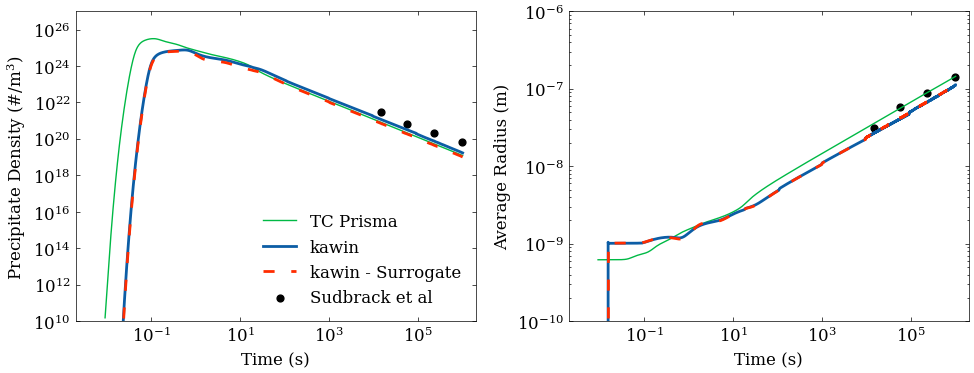

In [18]:
plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(1, 2, figsize=(10,4))

modelLoad = PrecipitateModel.load('NiCrAl_TC_NoSurr.npz')
modelLoad2 = PrecipitateModel.load('NiCrAl_TC.npz')

kawinColor = 'C0'
surrColor = 'C3'
surrStyle = (0,(4,6))
TcColor = 'C1'

#Precipitate density
axes[0].plot(tn, n, label='TC Prisma', color=TcColor)
modelLoad.plot(axes[0], 'Precipitate Density', linewidth=2, label='kawin', color=kawinColor)
modelLoad2.plot(axes[0], 'Precipitate Density', linewidth=2, linestyle=surrStyle, label='kawin - Surrogate', color=surrColor)

#Experimental data
expt = [14400, 57600, 230400, 950400]
expn = np.array([290, 68, 21, 7]) * 1e19
stdn = np.array([5, 1.1, 0.5, 0.13])*1e20
axes[0].scatter(expt, expn, color='k', s=24, label='Sudbrack et al')
#axes[0].errorbar(expt, expn, stdn, color='k', ms=0, fmt='o')
axes[0].set_ylim([1e10, 1e27])
axes[0].set_yscale('log')

#Avg. Radius
axes[1].plot(tr, r, label='TC Prisma', color=TcColor)
modelLoad.plot(axes[1], 'Average Radius', linewidth=2, label='kawin', color=kawinColor)
modelLoad2.plot(axes[1], 'Average Radius', linewidth=2, linestyle=surrStyle, label='kawin - Surrogate', color=surrColor)

#Experimental data
expr = np.array([3.11, 5.8, 8.8, 14.]) * 1e-8
stdr = np.array([0.27, 0.5, 0.5, 1.5])*1e-8
axes[1].scatter(expt, expr, color='k', s=24, label='Sudbrack et al')
#axes[2].errorbar(expt, expr, stdr, color='k', ms=0, fmt='o')
axes[1].set_ylim([1e-10, 1e-6])
axes[1].set_yscale('log')

axes[0].legend()
axes[0].set_xlim([2e-3, 2e6])
axes[1].set_xlim([2e-3, 2e6])

fig.tight_layout()
plt.show()